In [7]:
"""
Created on: Thu. 13 Oct. 2022
Updated on: Fri. 14 Oct. 2022
Author: Mélina Verger

Compute the intersection area (and the IoU ratio) and the normalized Euclidean distance between the 2 kde estimates curves.
Data distribution comparison.
"""

# To load the trained models
import pickle

# For data manipulation
import pandas as pd
import numpy as np

# Plotting module
import seaborn as sns
import matplotlib.pyplot as plt

# To compute area between two curves
import similaritymeasures

## Load data sets and trained models

In [9]:
DATA = pickle.load(open("../data/DATA", "rb"))
SPLIT = pickle.load(open("../data/SPLIT", "rb"))

print(DATA)
print(SPLIT)

stInfo
7030


In [10]:
# Load test sets

X_test = pd.read_csv("../data/X_test" + "_" + DATA + "_" + SPLIT + ".csv")
y_test = pd.read_csv("../data/y_test" + "_" + DATA + "_" + SPLIT + ".csv")

In [11]:
# Load trained models

clf_lr = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_lr", "rb"))
clf_svc = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_svc", "rb"))
clf_knearest = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_knearest", "rb"))
clf_dt = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_dt", "rb"))
clf_rf = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_rf", "rb"))

## Separate data sets by (un-)protected groups

At that moment, I chose 'gender', 'imd_band' and 'disability' as interesting features to evaluate fairness with.

In [12]:
X_test_gender_1 = X_test[X_test["gender"] == 1]
X_test_gender_0 = X_test[X_test["gender"] == 0]

y_test_gender_1 = y_test.loc[X_test_gender_1.index]
y_test_gender_0 = y_test.loc[X_test_gender_0.index]

In [13]:
X_test_imdband_1 = X_test[X_test["imd_band"] == 1]
X_test_imdband_0 = X_test[X_test["imd_band"] == 0]

y_test_imdband_1 = y_test.loc[X_test_imdband_1.index]
y_test_imdband_0 = y_test.loc[X_test_imdband_0.index]

In [14]:
X_test_disability_1 = X_test[X_test["disability"] == 1]
X_test_disability_0 = X_test[X_test["disability"] == 0]

y_test_disability_1 = y_test.loc[X_test_disability_1.index]
y_test_disability_0 = y_test.loc[X_test_disability_0.index]

## Plotting prediction probability distributions
(probability estimates)

In [15]:
models = [clf_lr, clf_knearest, clf_dt, clf_rf]

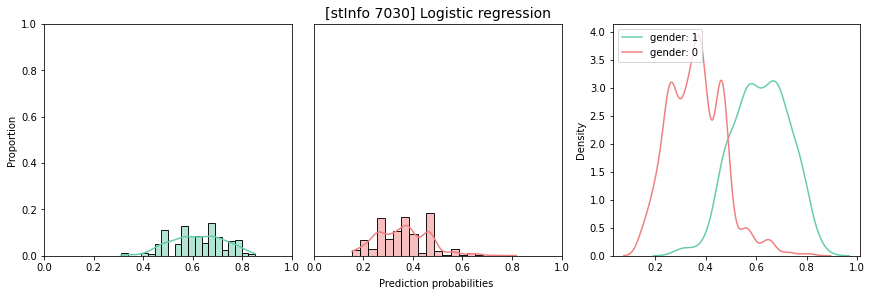

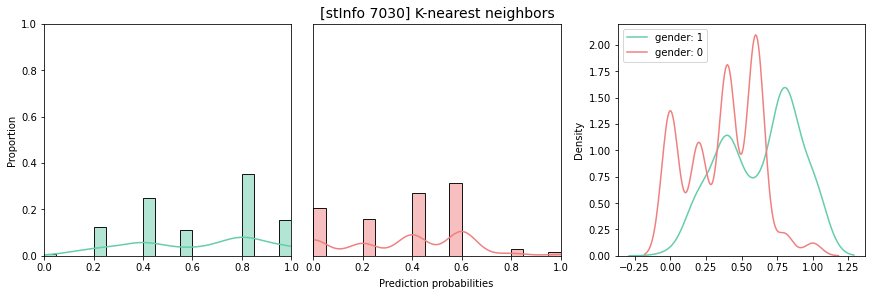

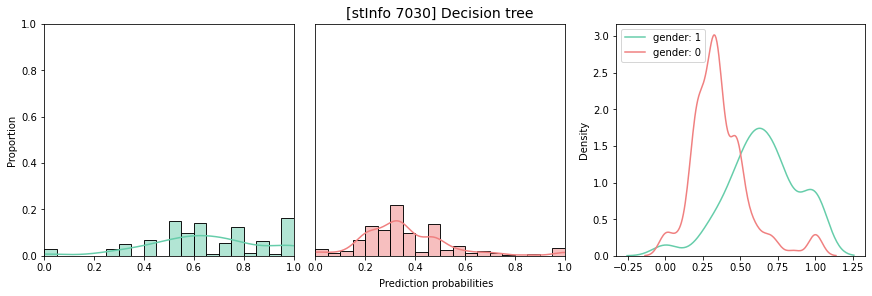

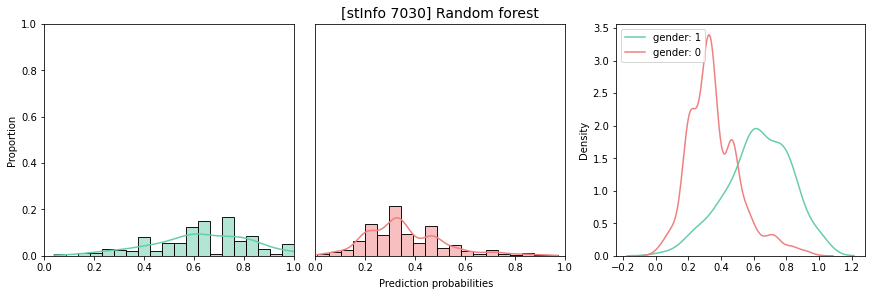

In [16]:
# Gender

for model in models:

    if model == clf_lr:
        model_name = "Logistic regression"
    elif model == clf_knearest:
        model_name = "K-nearest neighbors"
    elif model == clf_dt:
        model_name = "Decision tree"
    else:
        model_name = "Random forest"
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
    fig.supxlabel("Prediction probabilities", fontsize=10)
    ax0 = sns.histplot(ax=axes[0], data=model.predict_proba(X_test_gender_1)[:, 1], kde=True, stat="proportion", color="mediumaquamarine", bins=20)
    ax0.set_ylim(0, 1)
    ax0.set_xlim(0, 1)
    ax1 = sns.histplot(ax=axes[1], data=model.predict_proba(X_test_gender_0)[:, 0], kde=True, stat="proportion", color="lightcoral", bins=20)
    ax1.set_ylim(0, 1)
    ax1.set_xlim(0, 1)
    ax1.set_yticklabels([]) # turn off y ticks labels
    ax1.yaxis.set_visible(False)
    ax2 = sns.kdeplot(ax=axes[2], data=model.predict_proba(X_test_gender_1)[:, 1], color="mediumaquamarine", label="gender: 1")
    ax2 = sns.kdeplot(ax=axes[2], data=model.predict_proba(X_test_gender_0)[:, 0], color="lightcoral", label="gender: 0")
    plt.legend(loc="upper left")
    ax1.set_title(f"[{DATA} {SPLIT}] {model_name}", loc="center", fontsize=14)
    

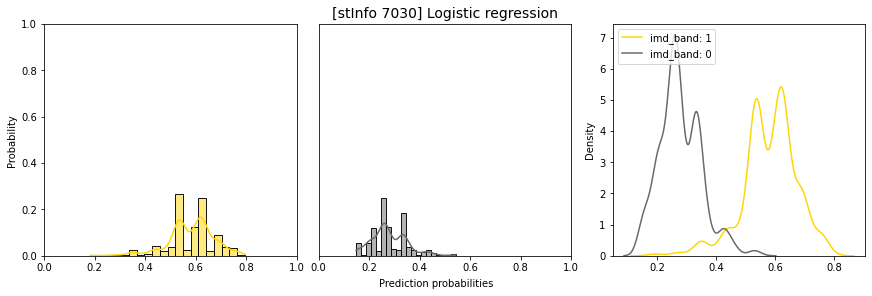

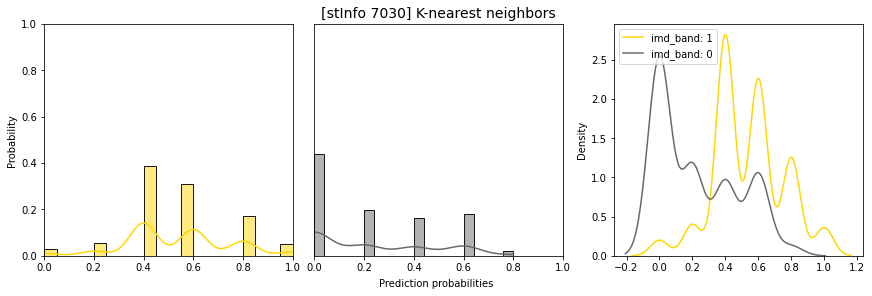

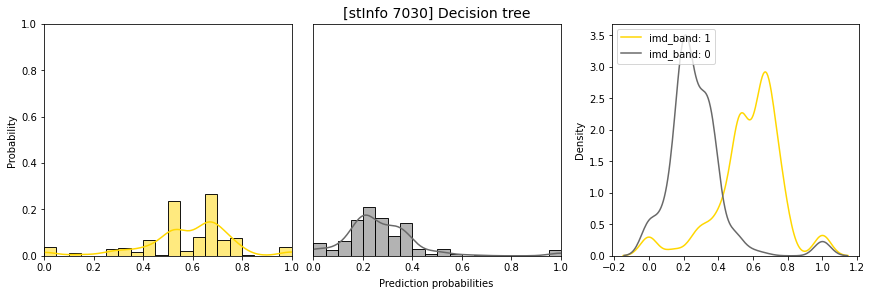

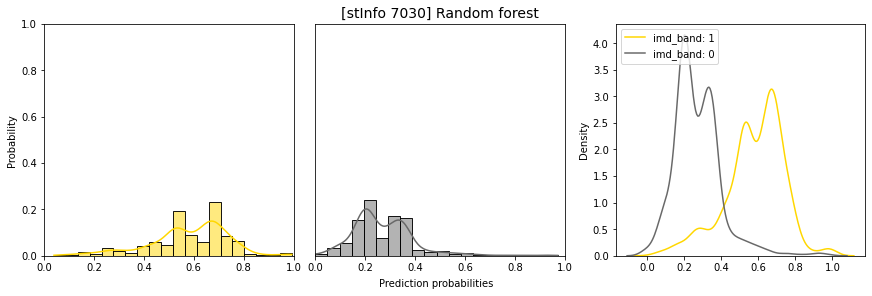

In [17]:
# Imd band

for model in models:

    if model == clf_lr:
        model_name = "Logistic regression"
    elif model == clf_knearest:
        model_name = "K-nearest neighbors"
    elif model == clf_dt:
        model_name = "Decision tree"
    else:
        model_name = "Random forest"

    fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
    fig.supxlabel("Prediction probabilities", fontsize=10)
    ax0 = sns.histplot(ax=axes[0], data=model.predict_proba(X_test_imdband_1)[:, 1], kde=True, stat="probability", color="gold", bins=20)
    ax0.set_ylim(0, 1)
    ax0.set_xlim(0, 1)
    ax1 = sns.histplot(ax=axes[1], data=model.predict_proba(X_test_imdband_0)[:, 0], kde=True, stat="probability", color="dimgray", bins=20)
    ax1.set_ylim(0, 1)
    ax1.set_xlim(0, 1)
    ax1.set_yticklabels([]) # turn off y ticks labels
    ax1.yaxis.set_visible(False)
    ax2 = sns.kdeplot(ax=axes[2], data=model.predict_proba(X_test_imdband_1)[:, 1], color="gold", label="imd_band: 1")
    ax2 = sns.kdeplot(ax=axes[2], data=model.predict_proba(X_test_imdband_0)[:, 0], color="dimgray", label="imd_band: 0")
    plt.legend(loc="upper left")
    ax1.set_title(f"[{DATA} {SPLIT}] {model_name}", loc="center", fontsize=14)

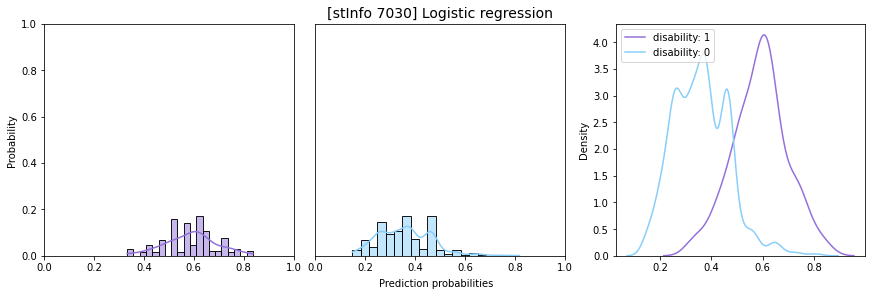

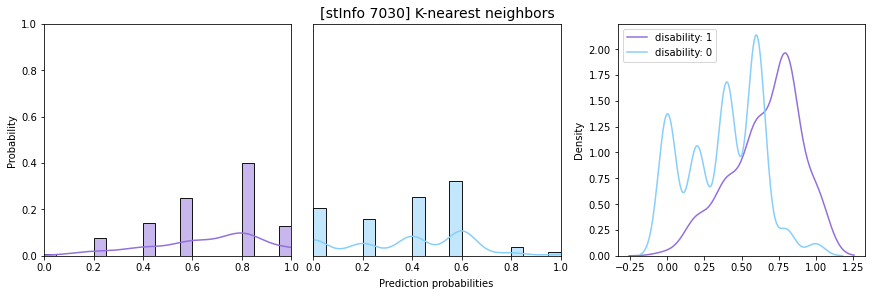

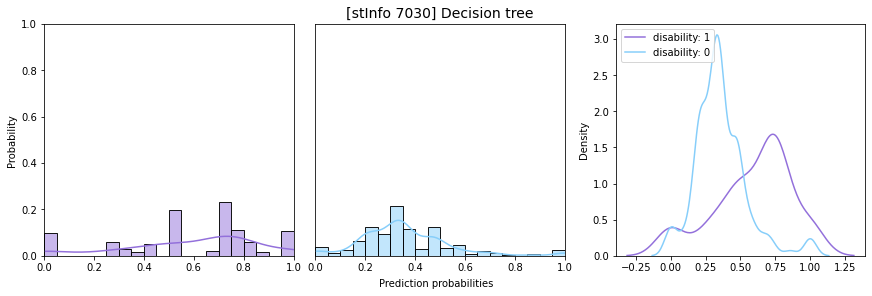

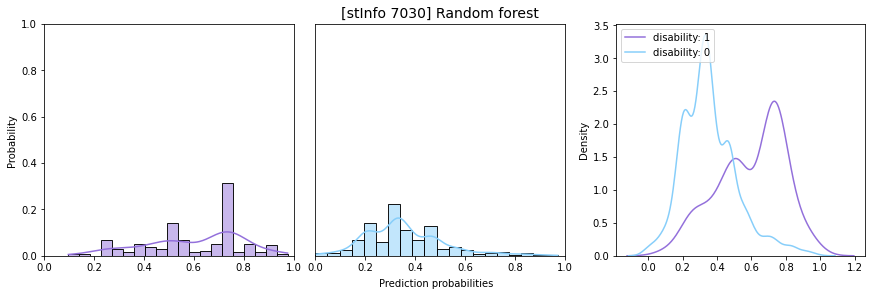

In [18]:
# Disability

for model in models:

    if model == clf_lr:
        model_name = "Logistic regression"
    elif model == clf_knearest:
        model_name = "K-nearest neighbors"
    elif model == clf_dt:
        model_name = "Decision tree"
    else:
        model_name = "Random forest"

    fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
    fig.supxlabel("Prediction probabilities", fontsize=10)
    ax0 = sns.histplot(ax=axes[0], data=model.predict_proba(X_test_disability_1)[:, 1], kde=True, stat="probability", color="mediumpurple", bins=20)
    ax0.set_ylim(0, 1)
    ax0.set_xlim(0, 1)
    ax1 = sns.histplot(ax=axes[1], data=model.predict_proba(X_test_disability_0)[:, 0], kde=True, stat="probability", color="lightskyblue", bins=20)
    ax1.set_ylim(0, 1)
    ax1.set_xlim(0, 1)
    ax1.set_yticklabels([]) # turn off y ticks labels
    ax1.yaxis.set_visible(False)
    ax2 = sns.kdeplot(ax=axes[2], data=model.predict_proba(X_test_disability_1)[:, 1], color="mediumpurple", label="disability: 1")
    ax2 = sns.kdeplot(ax=axes[2], data=model.predict_proba(X_test_disability_0)[:, 0], color="lightskyblue", label="disability: 0")
    #ax2.yaxis.tick_right()
    #ax2.yaxis.set_label_position("right")
    plt.legend(loc="upper left")
    ax1.set_title(f"[{DATA} {SPLIT}] {model_name}", loc="center", fontsize=14)